In [1]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor

In [2]:
X = np.random.randn(1000,1)
y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)

In [3]:
def calc_w(point: ndarray, X: ndarray, tau: float) -> ndarray:
    m = X.shape[0] 
    
    w = np.mat(np.eye(m)) 
    
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.power((point - xi), 2)/d)
        
    return w

\Theta = (X^TWX)^{-1} * X^TWY *normal equation*

https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf

In [4]:
def predict(X, y, point, tau): 
    m = X.shape[0] 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
    point_ = np.array([point, 1]) 
    w = wm(point_, X_, tau) 
    
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    pred = np.dot(point_, theta) 
    
    return theta, pred

In [5]:
def wm(point, X, tau): 
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w

In [8]:
def plot_lwr(X: ndarray, Y: ndarray, tau: float, nval:int):
    X_test = np.linspace(-3, 3, nval) 
    
    preds = [predict(X, y, point, tau)[1] for point in X_test] 
        
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)

    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()

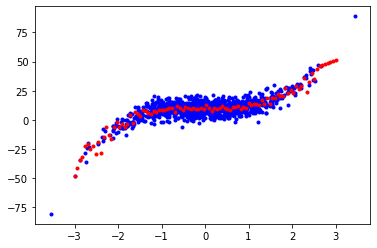

In [12]:
plot_lwr(X, y, 0.01, 100)